Train an SVM classifier on the MNIST dataset.

Since SVM classifiers are binary classifiers, you will need to use one-versus-all to classify all 10 digits. 

You may want to tune the hyperparameters using small test sets to speed up the process. What accuracy can you reach?

Preparing Dataset

In [20]:
from sklearn import datasets
mnist = datasets.fetch_openml("mnist_784")

In [21]:
type(mnist)

sklearn.utils._bunch.Bunch

In [22]:
X = mnist.data
y = mnist.target.astype(int)

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [44]:
df = pd.DataFrame(X)
df['label'] = y

df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [45]:
df.shape

(70000, 785)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to label
dtypes: int64(785)
memory usage: 419.2 MB


In [47]:
df.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0,70000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0,4.452429
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0,2.890195
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0,9.000000


In [49]:
sum(df.isnull().sum())

0

In [50]:
df.drop_duplicates(inplace=True)

In [61]:
rcount = int(.15*df.shape[0])
subset_df = df.sample(n=rcount)


In [62]:
subset_df.shape

(10500, 785)

In [67]:
subset_df.groupby('label').size()

label
0    1035
1    1209
2    1058
3    1052
4    1007
5     900
6    1028
7    1138
8    1029
9    1044
dtype: int64

Exploratory Data Analysis

<Axes: xlabel='label', ylabel='count'>

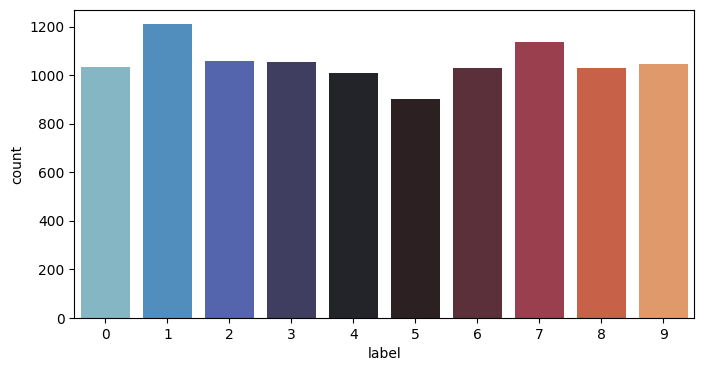

In [68]:
plt.figure(figsize=(8,4))
sns.countplot(x=subset_df['label'], palette = 'icefire')

Dataset Test and Train Split

In [69]:
X = subset_df.drop("label", axis = 1)
y = subset_df.label.values.astype(int)

In [ ]:
from sklearn.preprocessing import scale

X_scaled = scale(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 4)

In [81]:
print(y_train.mean())
print(y_test.mean())

4.484489795918368
4.3841269841269845


Building Linear SVM Model

In [82]:
from sklearn.svm import SVC

model = SVC(C = 1, gamma='auto')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [83]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[317,   0,   2,   0,   0,   0,   0,   1,   1,   1],
       [  0, 363,   6,   0,   1,   1,   1,   0,   1,   0],
       [  0,   0, 310,   4,   2,   0,   1,   2,   1,   0],
       [  0,   1,  11, 280,   0,   8,   1,   5,   2,   2],
       [  0,   3,   7,   0, 298,   1,   1,   1,   1,   4],
       [  2,   0,   5,   7,   3, 241,   7,   1,   2,   4],
       [  3,   0,   9,   0,   2,   2, 295,   0,   1,   0],
       [  0,   2,   7,   2,   5,   0,   0, 297,   1,  10],
       [  0,   3,  10,   7,   2,   6,   2,   2, 272,   2],
       [  2,   3,  10,   8,   8,   0,   0,   4,   3, 257]])

In [84]:
from sklearn.metrics import accuracy_score

print("Accuracy :", accuracy_score(y_test, y_pred))

Accuracy : 0.9301587301587302


In [85]:
from sklearn.model_selection import  KFold, cross_val_score

folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

model = SVC(C = 1, gamma='auto')


cv_results = cross_val_score(model, X_train, y_train, cv = folds, scoring = 'accuracy', n_jobs=-1)

print(cv_results)
print(f'mean accuracy = {cv_results.mean()}')

[0.93809524 0.92312925 0.92789116 0.93809524 0.92517007]
mean accuracy = 0.9304761904761906


In [86]:
from sklearn.model_selection import GridSearchCV

params = {"C": [0.1, 1, 10, 100, 1000]}

model = SVC(gamma='auto')

model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring='accuracy', cv=folds, n_jobs=-1,
                        verbose=1, return_train_score=True)

model_cv.fit(X_train, y_train)  

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 5 folds for each of 5 candidates, totalling 25 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,102.864854,6.048979,20.949506,2.114301,0.1,{'C': 0.1},0.861224,0.861905,0.863946,0.861224,...,0.862449,0.001247,5,0.878061,0.881633,0.880272,0.880952,0.880102,0.880204,0.001201
1,62.166461,2.553500,18.886832,3.087125,1.0,{'C': 1},0.938095,0.923129,0.927891,0.938095,...,0.930476,0.006402,4,0.979422,0.980272,0.980952,0.980612,0.981633,0.980578,0.000733
2,54.761607,5.500972,19.748128,1.525400,10.0,{'C': 10},0.942857,0.938095,0.934694,0.940136,...,0.938639,0.002735,1,0.999830,0.999830,0.999660,0.999830,0.999490,0.999728,0.000136
3,46.163536,6.879540,15.305166,3.584627,100.0,{'C': 100},0.941497,0.936054,0.933333,0.941497,...,0.937959,0.003173,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,39.826935,1.823908,11.655329,0.172902,1000.0,{'C': 1000},0.941497,0.936054,0.933333,0.941497,...,0.937959,0.003173,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


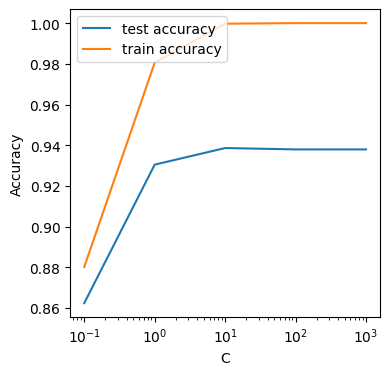

In [87]:
plt.figure(figsize=(4, 4))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [88]:
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test accuracy is {0} at C = {1}".format(best_score, best_C))

 The highest test accuracy is 0.9386394557823129 at C = 10


In [89]:
model = SVC(C=best_C, gamma='auto')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [90]:
print("Accuracy :", accuracy_score(y_test, y_pred))

Accuracy : 0.9387301587301587


Building Non Linear SVM Model

In [91]:
model = SVC(C = 1, gamma='auto', kernel='rbf')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [92]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[317,   0,   2,   0,   0,   0,   0,   1,   1,   1],
       [  0, 363,   6,   0,   1,   1,   1,   0,   1,   0],
       [  0,   0, 310,   4,   2,   0,   1,   2,   1,   0],
       [  0,   1,  11, 280,   0,   8,   1,   5,   2,   2],
       [  0,   3,   7,   0, 298,   1,   1,   1,   1,   4],
       [  2,   0,   5,   7,   3, 241,   7,   1,   2,   4],
       [  3,   0,   9,   0,   2,   2, 295,   0,   1,   0],
       [  0,   2,   7,   2,   5,   0,   0, 297,   1,  10],
       [  0,   3,  10,   7,   2,   6,   2,   2, 272,   2],
       [  2,   3,  10,   8,   8,   0,   0,   4,   3, 257]])

In [93]:
print("Accuracy :", accuracy_score(y_test, y_pred))

Accuracy : 0.9301587301587302


In [94]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

modelkernel=SVC(C = 1, gamma='auto', kernel='rbf')

cv_results = cross_val_score(model, X_train, y_train, cv=folds, scoring='accuracy', n_jobs=-1)

print(cv_results)
print(f'mean accuracy = {cv_results.mean()}')

[0.93809524 0.92312925 0.92789116 0.93809524 0.92517007]
mean accuracy = 0.9304761904761906


Observing the performance of our final Model

In [96]:
test_predict = model.predict(X_test)

<Axes: xlabel='Label', ylabel='count'>

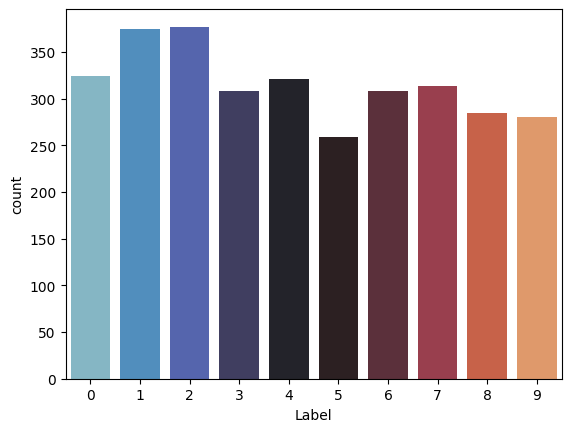

In [98]:
d = {'ImageId': np.arange(1,test_predict.shape[0]+1), 'Label': test_predict}
dataframe_to_export = pd.DataFrame(data=d)
sns.countplot(x=dataframe_to_export['Label'], palette = 'icefire')

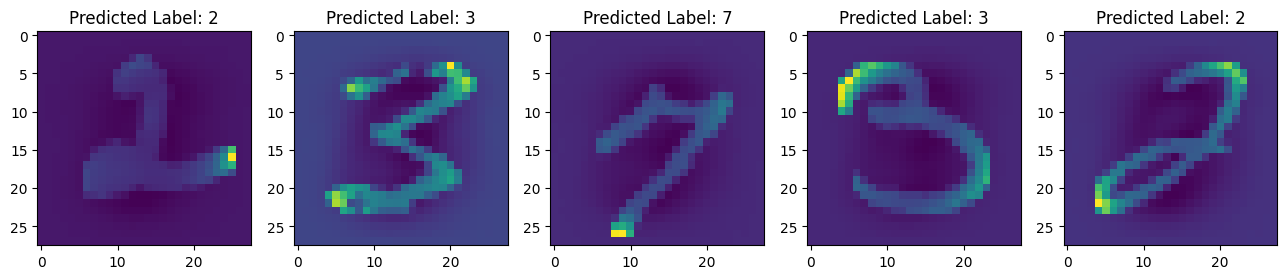

In [99]:
a = np.random.randint(1,test_predict.shape[0]+1,5)

plt.figure(figsize=(16,4))
for k,v in enumerate(a):
    plt.subplot(150+k+1)
    _2d = X_test[v].reshape(28,28)
    plt.title(f'Predicted Label: {test_predict[v]}')
    plt.imshow(_2d)
plt.show()